In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras_tuner as kt
import tensorflow as tf

In [2]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\HP\Desktop\Deeplearning_Assignment2_HeartDisease\heart_disease_health_indicators - heart_disease_health_indicators.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [4]:
data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
# Split dataset into features (X) and target (y)
X = data.drop(columns=['HeartDiseaseorAttack'])  # Features
y = data['HeartDiseaseorAttack']  # Target (binary classification: 0 or 1)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape

(202928, 21)

In [8]:
X_test.shape

(50733, 21)

In [9]:
# Initialize the scaler
#scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [10]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[reduce_lr, early_stopping,tensorboard_callback])

Epoch 1/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9010 - loss: 0.2747 - val_accuracy: 0.9075 - val_loss: 0.2373 - learning_rate: 0.0010
Epoch 2/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9054 - loss: 0.2485 - val_accuracy: 0.9075 - val_loss: 0.2378 - learning_rate: 0.0010
Epoch 3/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9063 - loss: 0.2445 - val_accuracy: 0.9075 - val_loss: 0.2368 - learning_rate: 0.0010
Epoch 4/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9071 - loss: 0.2418 - val_accuracy: 0.9075 - val_loss: 0.2370 - learning_rate: 0.0010
Epoch 5/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9057 - loss: 0.2452 - val_accuracy: 0.9075 - val_loss: 0.2373 - learning_rate: 0.0010
Epoch 6/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9054 - loss: 0.2447 - val_accuracy: 0.9075 - val_loss: 0.2366 - learning_rate: 0.0010
Epoch 7/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9

In [13]:
# Evaluate the accuracy on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.9086 - loss: 0.2351
Test Accuracy: 90.92%


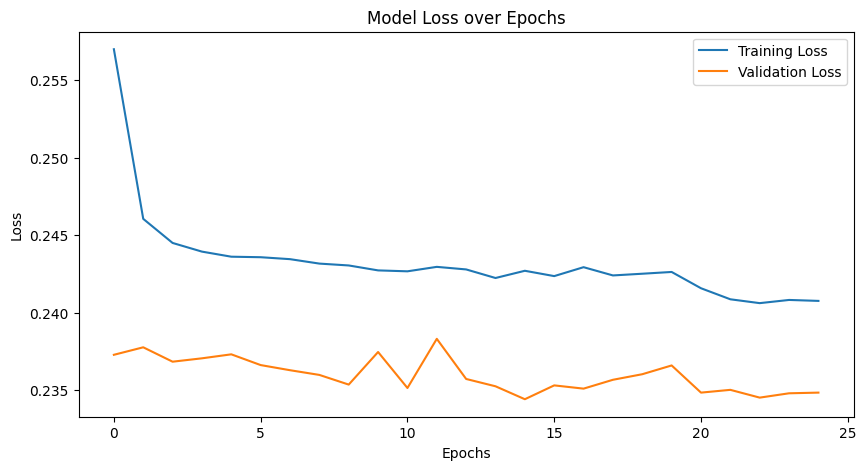

In [14]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step


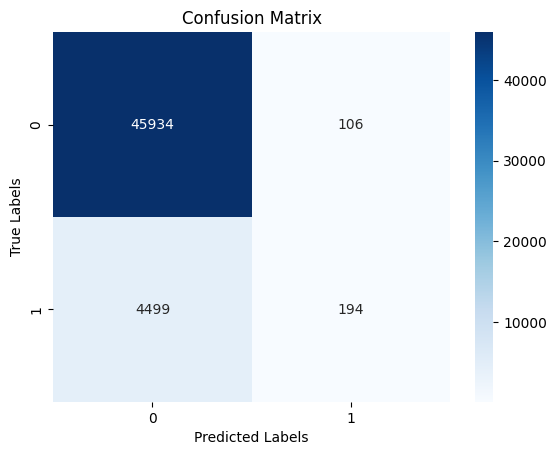

In [15]:
# Predict the labels for the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     46040
           1       0.65      0.04      0.08      4693

    accuracy                           0.91     50733
   macro avg       0.78      0.52      0.51     50733
weighted avg       0.89      0.91      0.87     50733



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step


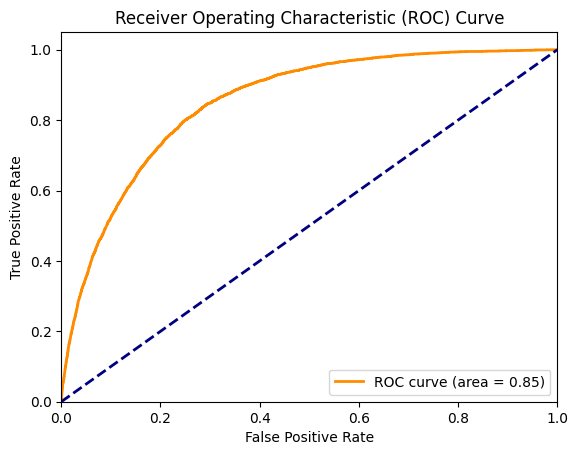

In [17]:
# ROC Curve and AUC
y_pred_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=128, step=64), # Reduced search space
                    activation=hp.Choice('activation', ['relu', 'tanh']),
                    input_dim=X_train.shape[1]))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.3))) # Reduced search space
    model.add(Dense(1, activation='sigmoid')) # Simplified architecture

    model.compile(optimizer=tf.keras.optimizers.Adam(
                  learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='heart_disease_tuning',
                     overwrite=True) # Add overwrite=True

tuner.search(X_train, y_train,
            epochs=10, # Reduced epochs
            validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best model's characteristics
print("Best Model Characteristics:")
print(f"Units in first layer: {best_hps.get('units_1')}")
print(f"Activation function: {best_hps.get('activation')}")
print(f"Dropout rate: {best_hps.get('dropout_1')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Trial 30 Complete [00h 00m 38s]
val_accuracy: 0.9076775312423706

Best val_accuracy So Far: 0.9084166884422302
Total elapsed time: 00h 07m 55s
Best Model Characteristics:
Units in first layer: 128
Activation function: relu
Dropout rate: 0.2
Learning rate: 0.0004946335973320493


In [19]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

In [20]:
best_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping]) # Use early stopping

Epoch 1/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 781us/step - accuracy: 0.8978 - loss: 0.2710 - val_accuracy: 0.9074 - val_loss: 0.2401
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 744us/step - accuracy: 0.9065 - loss: 0.2421 - val_accuracy: 0.9077 - val_loss: 0.2387
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 735us/step - accuracy: 0.9084 - loss: 0.2366 - val_accuracy: 0.9078 - val_loss: 0.2386
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 725us/step - accuracy: 0.9086 - loss: 0.2371 - val_accuracy: 0.9077 - val_loss: 0.2386
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 723us/step - accuracy: 0.9084 - loss: 0.2365 - val_accuracy: 0.9077 - val_loss: 0.2388
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 734us/step - accuracy: 0.9075 - loss: 0.2385 - val_accuracy: 0.9074 - val_loss: 0.2387
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 742us/step - accuracy: 0.9091 - loss: 0.2352 - val_accuracy: 0.9071 - val_loss: 0.2386
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 738us/step - accuracy: 0.9087 -